In [27]:
import numpy as np
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
# classId,start,end
from Tools.LossesAndMetrics.CustomRecurrenceMatrix import getCustomGraphMatrixFromBounds
labels = [ #b
           #  [1,3,10],
           #  #b
           # [2,13,15],
           # [2,16,20],
           # [3,21,24],
#           [4,29,30]
]
seqLen = 30
l_ext = []
for lab in labels:
    l_ext.append(" ")
    l_ext.append(lab[0])
l_ext.append(" ")
l_ext = "".join(map(str,l_ext))
print(l_ext)

In [29]:
canOutBeforeEnd = True
U = len(labels)*2+1
matrix = np.zeros(shape=[seqLen,U,U])
current = 1
if True:
    for id, lab in enumerate(labels):
        classId, start, end = lab
        if start == 0:
            start = 1
        if end >= seqLen - 1:
            end = seqLen - 1
        idWithBlank = id * 2 + 1
        if current < start:
            matrix[current - 1:start, idWithBlank - 1, idWithBlank - 1] = 1
        current = end + 1
        matrix[start - 1:end, idWithBlank - 1, idWithBlank] = 1  # blank to char
        matrix[start - 1:end - 1, idWithBlank - 1, idWithBlank - 1] = 1  # blank to blank
        matrix[start:end, idWithBlank, idWithBlank] = 1  # char to char
        if canOutBeforeEnd:
            matrix[start:end, idWithBlank, idWithBlank + 1] = 1  # char to char
            matrix[start + 1:end + 1, idWithBlank + 1, idWithBlank + 1] = 1  # char to char
        matrix[end, idWithBlank, idWithBlank + 1] = 1  # char to blank
        matrix[end - 1, idWithBlank, idWithBlank + 1] = 1  # char to blank
        if id + 1 < len(labels) and labels[id + 1][1] == end + 1:
            if labels[id + 1][0] != classId:
                matrix[end, idWithBlank, idWithBlank + 2] = 1  # char to next char
            # else :
            #     matrix[end-1,idWithBlank,idWithBlank+1] = 1# char to blank

    if current < seqLen:
        matrix[current - 1:seqLen , -1, -1] = 1

In [30]:
canOutBeforeEnd = True
matrix = getCustomGraphMatrixFromBounds(labels,seqLen,canOutBeforeEnd)

In [31]:
np.set_printoptions(threshold=sys.maxsize)

In [32]:
matrix[-2]

array([[1]])

In [33]:
print(matrix[9])

[[1]]


In [34]:
print(matrix[20])

[[1]]


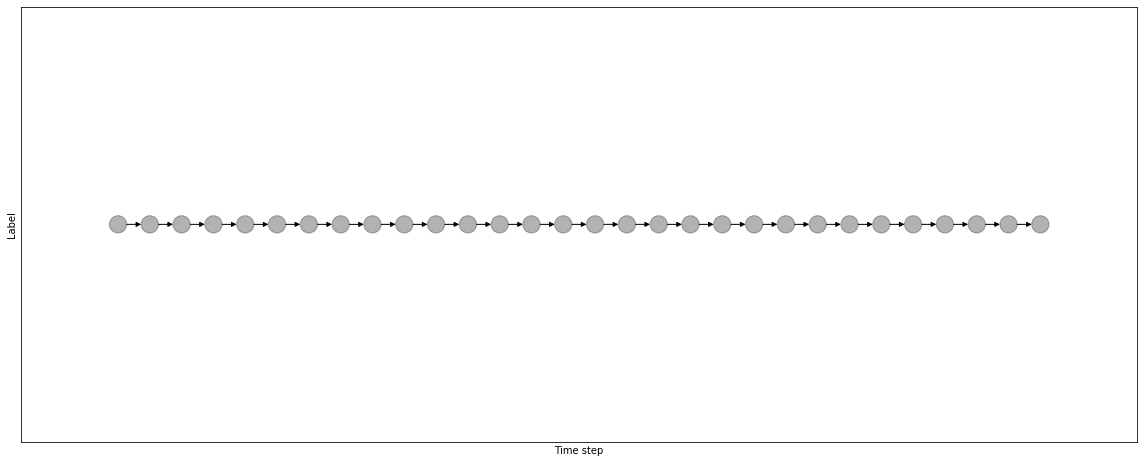

In [35]:

G = nx.DiGraph()

node_pos = {}
node_alpha = []
node_colors = []

def graphFromMatrix(matrix):
    for t,mat_t in enumerate(matrix):
        for letter in range(len(mat_t)):
            G.add_node((t,letter))
            node_colors.append('black')
            node_alpha.append(0.3)
            node_pos[(t, letter)] = (t, len(l_ext)-letter)
        for idLine,line in enumerate(mat_t):
            for idCol,col in enumerate(line):
                if mat_t[idLine][idCol]==1 and t+1<len(matrix):
                     G.add_edge((t, idLine), (t+1, idCol))


graphFromMatrix(matrix)
plt.figure(figsize=(20, 8))
nx.draw_networkx_nodes(G, pos=node_pos, node_color=node_colors, alpha=node_alpha)
nx.draw_networkx_edges(G, pos=node_pos)
plt.xlabel('Time step')
plt.ylabel('Label')
plt.yticks(range(1, len(l_ext)+1), labels=reversed(l_ext.replace(' ', '*')));
plt.xticks(range(0, seqLen+1),labels = range(0, seqLen+1));

In [36]:
l_ext


' '